# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [158]:
import pandas as pd
df = pd.read_csv("marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

In [ ]:
# Есть два типа данных: int и object. 
# Проще будет работать с int, нежели чем с object

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

### Способ преобразования был взят тут: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html

In [83]:
df['Income'] = df['Income'].replace({'\$':''}, regex = True)
df['Income'] = df['Income'].replace({'\,':''}, regex = True)

In [84]:
df[['Income']]

,Income
0,84835.00
1,57091.00
2,67267.00
3,32474.00
4,21474.00
...,...
2235,66476.00
2236,31056.00
2237,46310.00
2238,65819.00


In [85]:
df["Income"]=df.Income.astype('float')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [160]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

In [161]:
df[['Dt_Customer']]

,Dt_Customer
0,2014-06-16
1,2014-06-15
2,2014-05-13
3,2014-05-11
4,2014-04-08
...,...
2235,2013-03-07
2236,2013-01-22
2237,2012-12-03
2238,2012-11-29


## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [89]:
df.isnull().sum()
#Как видим, в Income пропущено 24 значения, приступим к обработке. 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [90]:
# Заполним пропущенные ячейки значениями используя медиану 
median = df['Income'].median()
df['Income'].fillna(median, inplace=True)

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

In [91]:
df.info("Column")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<AxesSubplot:>

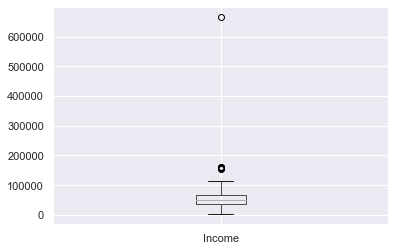

In [92]:
import numpy

df.boxplot('Income')

In [93]:
df.Income.sort_values(ascending = False).head()

527     666666.0
731     162397.0
497     160803.0
853     157733.0
2204    157243.0
Name: Income, dtype: float64

## Выбросы будем искать при помощи IQR подхода. 

### IQR это разница между первым квартилем (Q1) и третьим квартилью (Q3) соответственно.

### Q1 относится к первому квартилю - 25%. Q3 относится к третьему квартилю - 75%.

### Мы будем использовать boxplots для обнаружения и визуализации выбросов, присутствующих в наборе данных.

### Ссылка на сайт, материал которого помог в работе с выбросами: https://pythobyte.com/detection-removal-outliers-in-python-adaa857e/

In [94]:
for x in ['Income']:
    q75,q25 = numpy.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = numpy.nan
    df.loc[df[x] > max,x] = numpy.nan

In [95]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 8
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [96]:
df = df.dropna(axis = 0)

In [97]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

### Все выбросы в колонке Income были обнаружены, визулизированы и удалены
### Такую же работу проведем и с остальными колонками, где обнаружим выбросы


<AxesSubplot:>

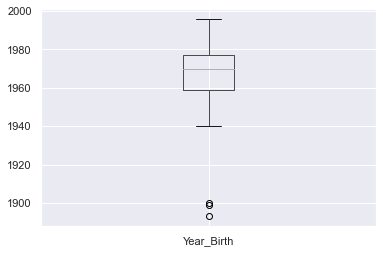

In [98]:
# Приступим к обработке значений в колонке Year_Birth
df.boxplot('Year_Birth')

In [163]:
for x in ['Year_Birth']:
    q75,q25 = numpy.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = numpy.nan
    df.loc[df[x] > max,x] = numpy.nan

In [164]:
df.isnull().sum()

ID                      0
Year_Birth              3
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [165]:
df = df.dropna(axis = 0)

In [166]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

### Тут я решил объединить переменные

<AxesSubplot:>

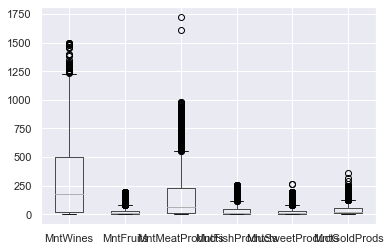

In [103]:
acc = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df.boxplot(acc)

In [104]:
for x in acc:
    for i in x:
        q75,q25 = numpy.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = numpy.nan
        df.loc[df[x] > max,x] = numpy.nan

In [105]:
df.isnull().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                35
MntFruits              247
MntMeatProducts        173
MntFishProducts        223
MntSweetProducts       240
MntGoldProds           206
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Response                 0
Complain                 0
Country                  0
dtype: int64

In [106]:
df = df.dropna(axis = 0)

In [107]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

### Мы обработали несколько переменных, обнаружили выбросы, визулизировали и удалили их. Приступим к обработке следующих переменных

<AxesSubplot:>

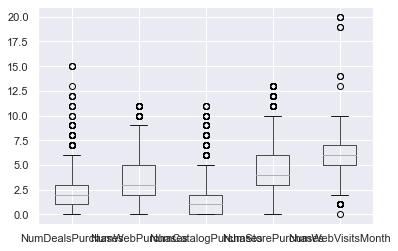

In [108]:
acc_1 = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
df.boxplot(acc_1)

In [109]:
for x in ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']:
    for i in x:
        q75,q25 = numpy.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = numpy.nan
        df.loc[df[x] > max,x] = numpy.nan

In [110]:
df.isnull().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases       65
NumWebPurchases         43
NumCatalogPurchases     85
NumStorePurchases      101
NumWebVisitsMonth       43
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Response                 0
Complain                 0
Country                  0
dtype: int64

In [111]:
df = df.dropna(axis = 0)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

### Обработали переменные Mnt, нашли выбросы, показали визуально и удалили их

## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

### Создадим признак, который будет показывать зависимость количество сладкого, купленного за последние два года от количества детей и подростков в семье


#### Создадим новую колонку. Суммурием количество детей и подростков в семье

In [113]:
df['SumKidsHome'] = df[['Kidhome','Teenhome']].sum(axis=1)

In [114]:
df['SumKidsHome']

1       0
2       1
3       2
4       1
7       1
       ..
2231    1
2232    1
2234    1
2236    1
2237    1
Name: SumKidsHome, Length: 1336, dtype: int64

In [115]:
import matplotlib.pyplot as plt

### Материалы по seaborn и метод визуализации использовал с этого сайта: https://seaborn.pydata.org/introduction.html

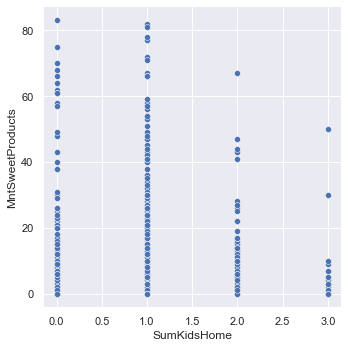

In [116]:
import seaborn as sns

sns.set_theme()

sns.relplot(
    data=df,
    x="SumKidsHome", y="MntSweetProducts",
)

#### Можно сделать вывод о том, что при увеличении количества детей в семье, количество покупок сладкого уменьшается. 

#### Узнаем, зависит ли количество покупок фруктов от количества детей в семье. 

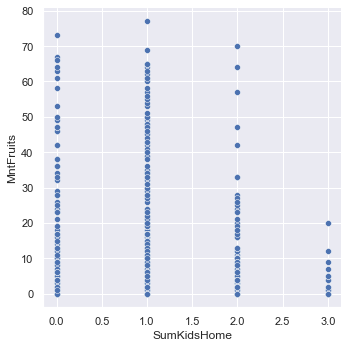

In [156]:
sns.set_theme()

sns.relplot(
    data=df,
    x="SumKidsHome", y="MntFruits",
)

#### Как видим, с увеличением количества детей в семье, количество покупок фруктов снижается. 

### Создадим новый признак. Суммируем количество покупок сделанных в магазинах, с помощью каталогов, через интернет-ресурс и со скидками. Этот признак покажет нам количество совершенных покупок за последние 2 года каждым пользователем.

In [38]:
df['SumPurchases'] = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

In [39]:
df[['SumPurchases']]

,SumPurchases
1,18.0
2,11.0
3,4.0
4,8.0
7,7.0
...,...
2231,7.0
2232,7.0
2234,20.0
2236,5.0


## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

#### Два способа вывода категориальных переменных:

In [40]:
df.describe(include = 'object')

,Education,Marital_Status,Country
count,1336,1336,1336
unique,5,7,8
top,Graduation,Married,SP
freq,640,523,662


In [41]:
df[['Education','Marital_Status','Country']].describe()

,Education,Marital_Status,Country
count,1336,1336,1336
unique,5,7,8
top,Graduation,Married,SP
freq,640,523,662


In [ ]:
# Очевидно, можно сделать вывод, что чаще всего пользователи окончили образование, уже женаты и проживают в SP. 

Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

In [167]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,...,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,5586.899232,1968.917307,0.441934,0.505648,49.007682,305.153638,26.323995,166.962494,37.635337,27.034794,...,2.671487,5.805242,5.321735,0.073656,0.074108,0.072752,0.064166,0.013556,0.150474,0.009038
std,3247.819194,11.700216,0.536965,0.544236,28.941864,337.305490,39.735932,224.226178,54.763278,41.085433,...,2.927096,3.250752,2.425092,0.261269,0.262005,0.259788,0.245104,0.115666,0.357617,0.094657
min,0.000000,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2815.000000,1959.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,1970.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8420.000000,1977.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Минимальный доход пользователей - 7500$
#### Самый молодой пользователь родился в 1996 году. 
#### Максимальное количество детей и подростков в семье - 3. Однако же максимальное количество и детей и подростков в семье по отдельности - 2. Значит, что нет ни одной семьи, где двое подростков и двое детей. 

Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

In [43]:
df.groupby(['Country','Education','Marital_Status']).aggregate({'Income': 'mean','MntWines': 'mean','MntMeatProducts': 'mean'})

Income    MntWines  MntMeatProducts
Country Education Marital_Status                                           
AUS     2n Cycle  Married         15609.000000    4.500000        14.000000
                  Single          46519.750000    6.500000        10.500000
                  Together        39983.666667   35.333333        21.666667
        Basic     Married         17487.000000    0.000000         1.000000
                  Together        22512.000000    1.000000         7.500000
...                                        ...         ...              ...
US      Master    Widow           47570.000000   67.000000        20.000000
        PhD       Divorced        50611.000000  459.000000        24.000000
                  Married         53919.500000  375.000000        90.500000
                  Single          44338.500000  101.000000       143.500000
                  Together        30351.000000   14.000000        24.000000

[148 rows x 3 columns]

In [44]:
df.groupby(['Country','Education']).aggregate({'Income': 'mean','MntWines': 'mean','MntGoldProds': 'mean'})

Income    MntWines  MntGoldProds
Country Education                                         
AUS     2n Cycle    34886.928571   18.285714     27.000000
        Basic       21158.500000    1.250000     22.000000
        Graduation  42796.849057  136.245283     24.132075
        Master      42626.552632  175.578947     22.105263
        PhD         43652.305556   99.277778     20.722222
CA      2n Cycle    34119.615385   37.230769     20.461538
        Basic       19648.000000    1.857143     18.000000
        Graduation  38557.282895   98.631579     20.605263
        Master      45012.310345  176.344828     20.034483
        PhD         49107.564516  247.548387     15.709677
GER     2n Cycle    32805.035714   39.500000     18.142857
        Basic       17306.500000    3.000000     22.000000
        Graduation  44596.106061  126.909091     29.424242
        Master      43818.692308   87.923077     29.153846
        PhD         48157.500000  293.500000     13.200000
IND     2n Cycle    33048.000000   76.636364     30.000000
        Basic       21058.500000    2.500000     26.500000
        Graduation  37045.250000   96.884615     25.826923
        Master      39155.666667  121.083333     20.500000
        PhD         48472.571429  203.500000     14.428571
ME      PhD         52614.000000  789.000000     38.000000
SA      2n Cycle    38855.812500  112.875000     19.125000
        Basic       21669.166667    2.500000     12.833333
        Graduation  37191.653333   71.773333     21.186667
        Master      43341.500000  181.142857     22.714286
        PhD         45281.083333  171.645833     16.854167
SP      2n Cycle    34013.033898   39.694915     18.169492
        Basic       20239.384615    3.576923     21.923077
        Graduation  38552.678797  106.680380     21.439873
        Master      42037.794393  142.242991     22.887850
        PhD         44967.285714  179.493506     17.331169
US      2n Cycle    45020.250000  200.500000     20.250000
        Basic       12613.333333    4.666667     16.000000
        Graduation  45487.785714  146.228571     27.342857
        Master      47791.730769  142.076923     19.076923
        PhD         48436.444444  292.666667     11.444444

In [45]:
df.groupby(['Country','Marital_Status']).aggregate({'Income': 'mean','MntWines': 'mean','MntGoldProds': 'mean'})

Income    MntWines  MntGoldProds
Country Marital_Status                                        
AUS     Divorced        43077.333333  197.500000     21.666667
        Married         38279.671053  148.342105     25.184211
        Single          44888.972222   88.222222     29.111111
        Together        41911.948276   70.103448     19.068966
        Widow           49429.500000  212.250000     13.750000
CA      Alone           35018.000000   10.000000     20.000000
        Divorced        39460.473684  106.473684     14.684211
        Married         40917.200000  151.850000     19.466667
        Single          40489.250000   97.968750     18.156250
        Together        40189.500000  140.394737     21.684211
        Widow           48257.500000  208.750000     23.000000
        YOLO            48432.000000  322.000000     42.000000
GER     Divorced        48207.600000   59.200000     29.400000
        Married         39412.038462  121.820513     24.358974
        Single          43554.055556   75.777778     14.666667
        Together        43558.117647  141.294118     24.235294
        Widow           53095.500000  347.000000     69.500000
IND     Divorced        49737.666667  274.833333     18.833333
        Married         36898.875000  106.875000     16.656250
        Single          38173.960000  110.040000     33.560000
        Together        34806.964286   62.785714     22.678571
        Widow           66033.000000  293.000000     65.000000
        YOLO            48432.000000  322.000000     42.000000
ME      Single          52614.000000  789.000000     38.000000
SA      Divorced        42214.869565  180.043478     26.217391
        Married         40815.754098  125.491803     16.901639
        Single          38003.971429  110.971429     19.971429
        Together        40208.516667  113.833333     20.016667
        Widow           41445.500000   67.625000     25.125000
SP      Divorced        38473.311475  116.868852     17.081967
        Married         40672.166667  128.711111     20.611111
        Single          36431.620805   93.228188     19.657718
        Together        40044.666667  127.716049     22.098765
        Widow           44737.050000  127.300000     20.950000
US      Divorced        55304.750000  325.625000     18.625000
        Married         40026.282609  102.260870     15.391304
        Single          42624.222222  143.888889     27.444444
        Together        47157.346154  175.000000     28.769231
        Widow           61945.000000  296.500000     33.000000

#### Выводы относительно полученных данных: Самые высокие доходы у PhD по всем странам. Можно сказать, что образование играет важную роль в доходе граждан. 

#### Также стоит отметить, что чаще всего именно люди с образованием PhD тратят больше всего на вино, кроме исключений в виде стран: SA, AUS. 

#### Если говорить про траты на товары роскоши (MntGoldProducts), можно сделать вывод, что чем выше образование, тем меньше человек тратит на роскошь. 

#### Также стоит отметить, что зачастую вдовы тратят больше всех на вино

## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

### Тут я нашел способ вывести максимальные и минимальные корреляции признаков друг с другом. Данный код подсказал один из пользователей на Stackoverflow. Ссылка: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

In [51]:
df.corr().unstack().sort_values().drop_duplicates()

Teenhome      Year_Birth            -0.517323
Kidhome       NumStorePurchases     -0.485316
Income        NumWebVisitsMonth     -0.444444
MntWines      Kidhome               -0.424136
Kidhome       NumCatalogPurchases   -0.423823
                                       ...   
SumPurchases  NumCatalogPurchases    0.750506
MntWines      SumPurchases           0.756814
SumPurchases  NumStorePurchases      0.858238
              NumWebPurchases        0.887353
ID            ID                     1.000000
Length: 326, dtype: float64

### Как видим, наибольшая корреляция у признаков: NumCatalogPurchases и MntMeatProducts, NumCatalogPurchases и MntWines, NumStorePurchases и MntWines. Корреляцию признаков NumWebPurchases и MntWines мы не берем, так как это 4 по силе корреляция, а нам согласно заданию необходимо выделить 3 самых сильных. 

### Почему же они взаимосвязаны? Можно сказать, что возможно вино чаще всего выбирают через каталоги и в магазинах по той причине, потому что в каталоге можно сравнить позиции и выбрать то, что подходит тебе. Также в магазине проще всего выбрать вино, так как весь ассортимент располагается перед тобой, можно сравнить позиции между собой и послушать их. Также в магазине тебе может помочь консультант. Если говорить про MntMeatProducts и NumCatalogPurchases, можно сказать, что есть возможность выбора.

## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

#### Построим линейный график, который отражает отношение количества покупаемого сладкого и количества детей в семье:

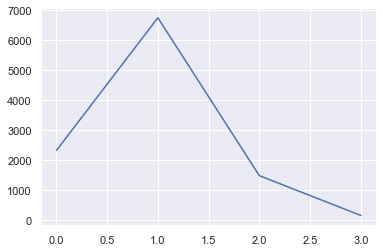

In [53]:
pilp = df.groupby('SumKidsHome').MntSweetProducts.sum()
plt.plot(pilp.index, pilp.values);

#### Как видим, с увеличением количества детей, уменьшается количество покупок сладкого

#### Теперь построим столбчатую диаграмму, которая отобразит количество покупок по отношению к образованию:

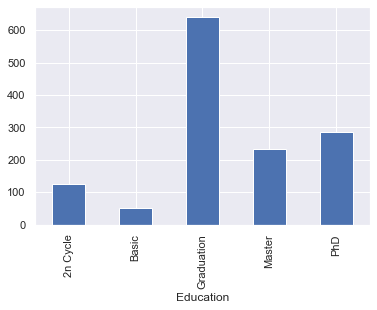

In [65]:
df.groupby('Education').SumPurchases.count().plot(kind='bar');

#### Теперь отобразим зависимость количества детей в семье и количества трат на фрукты:

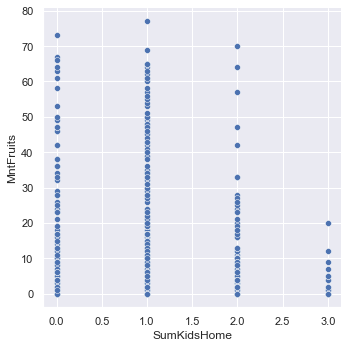

In [117]:
sns.set_theme()

sns.relplot(
    data=df,
    x="SumKidsHome", y="MntFruits",
)

### Отобразим корреляционную матрицу при помощи HeatMap. Данный способ нашел на сайте: https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Отрицательные значения я решил выделить черным цветом. 

### Цветные области показывают нам корреляцию между признаками. Чем светлее область, тем выше корреляция. 

<AxesSubplot:>

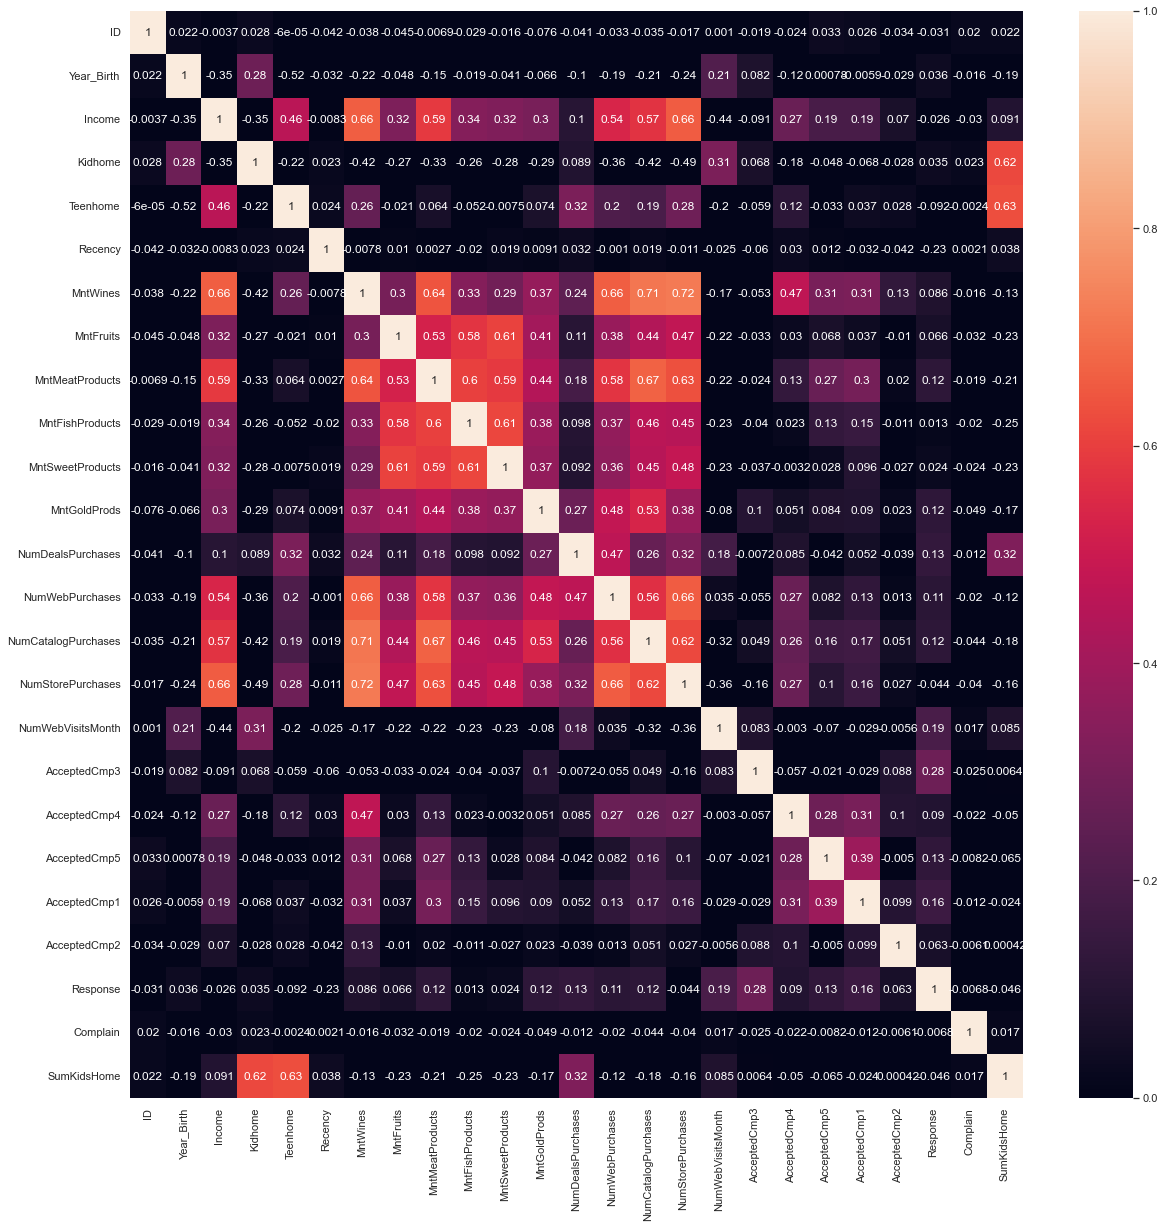

In [119]:
corr_matrix = df.corr()


plt.figure(figsize= (20, 20))
sns.heatmap(corr_matrix, vmin = .0, annot = True)

### Теперь сравним количество потраченных денег на вино и семейным положением. Для начала уберем значения YOLO

In [141]:
df[df.Marital_Status == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,SumKidsHome
103,492,1973.0,PhD,YOLO,48432.0,0,1,2012-10-18,3,322.0,...,8.0,0,0,0,0,0,0,0,CA,1
104,11133,1973.0,PhD,YOLO,48432.0,0,1,2012-10-18,3,322.0,...,8.0,0,0,0,0,0,1,0,IND,1


In [142]:
df = df.drop(labels = [103,104], axis = 0)

### Теперь построим Barplot и визульно покажем разницу:

<AxesSubplot:xlabel='Marital_Status', ylabel='MntWines'>

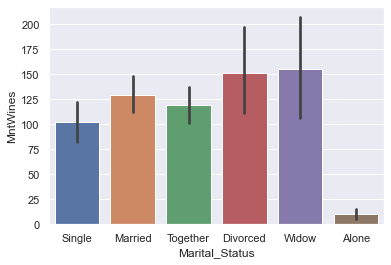

In [143]:
sns.barplot(data=df, x=df['Marital_Status'], y=df['MntWines'])

#### Как можно заметить, больше всего на вино тратят вдовы, а одинокие люди пьют его реже всех

#### Теперь отобразим уровень дохода в зависимости от образования:

<AxesSubplot:xlabel='Education', ylabel='Income'>

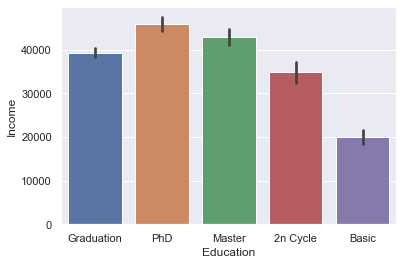

In [145]:
sns.barplot(data=df, x=df['Education'], y=df['Income'])

#### Можно сделать вывод о том, что образование играет роль в доходе. Люди с уровнем PhD зарабатывают больше всех. Уровень Basic имеет самый низкий доход. 

## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

In [149]:
df.groupby(['Country','Education']).aggregate({'MntFishProducts': 'mean','MntWines': 'mean','MntMeatProducts': 'mean'})

MntFishProducts    MntWines  MntMeatProducts
Country Education                                               
AUS     2n Cycle          10.142857   18.285714        16.285714
        Basic             16.000000    1.250000        10.000000
        Graduation        12.698113  136.245283        47.169811
        Master            18.052632  175.578947        73.473684
        PhD                7.055556   99.277778        29.611111
CA      2n Cycle           6.076923   37.230769        17.384615
        Basic             10.571429    1.857143         5.857143
        Graduation         9.644737   98.631579        34.644737
        Master             8.344828  176.344828        51.551724
        PhD               16.100000  245.066667        74.300000
GER     2n Cycle          13.285714   39.500000        24.500000
        Basic              9.500000    3.000000         8.000000
        Graduation         8.818182  126.909091        52.818182
        Master             7.615385   87.923077        40.615385
        PhD                3.500000  293.500000        70.000000
IND     2n Cycle          23.454545   76.636364        46.454545
        Basic             16.750000    2.500000         9.000000
        Graduation        11.576923   96.884615        37.865385
        Master             4.750000  121.083333        46.250000
        PhD                3.538462  194.384615        37.153846
ME      PhD               12.000000  789.000000       142.000000
SA      2n Cycle          17.437500  112.875000        42.500000
        Basic             10.500000    2.500000         6.333333
        Graduation        11.400000   71.773333        39.720000
        Master            10.500000  181.142857        58.500000
        PhD                8.916667  171.645833        44.125000
SP      2n Cycle          15.711864   39.694915        26.389831
        Basic             10.423077    3.576923         8.269231
        Graduation        12.620253  106.680380        49.452532
        Master             9.813084  142.242991        56.242991
        PhD                7.915584  179.493506        54.396104
US      2n Cycle          12.750000  200.500000        47.000000
        Basic              7.333333    4.666667        10.666667
        Graduation        21.000000  146.228571        65.342857
        Master             5.692308  142.076923        38.153846
        PhD               18.333333  292.666667        80.111111

## Исходя из выше представленных данных, можно сделать вывод о том, что чаще всего люди выбирают к вину не рыбу!, а мясо. 

In [151]:
df.groupby(['Country','Marital_Status']).aggregate({'MntGoldProds': 'mean','MntWines': 'mean','MntMeatProducts': 'mean'})

MntGoldProds    MntWines  MntMeatProducts
Country Marital_Status                                           
AUS     Divorced           21.666667  197.500000        63.833333
        Married            25.184211  148.342105        50.789474
        Single             29.111111   88.222222        33.444444
        Together           19.068966   70.103448        37.310345
        Widow              13.750000  212.250000        50.750000
CA      Alone              20.000000   10.000000        16.000000
        Divorced           14.684211  106.473684        35.157895
        Married            19.466667  151.850000        48.816667
        Single             18.156250   97.968750        31.250000
        Together           21.684211  140.394737        49.052632
        Widow              23.000000  208.750000        32.750000
GER     Divorced           29.400000   59.200000        54.000000
        Married            24.358974  121.820513        35.384615
        Single             14.666667   75.777778        43.777778
        Together           24.235294  141.294118        59.235294
        Widow              69.500000  347.000000       139.500000
IND     Divorced           18.833333  274.833333        55.833333
        Married            16.656250  106.875000        27.593750
        Single             33.560000  110.040000        52.040000
        Together           22.678571   62.785714        30.571429
        Widow              65.000000  293.000000       179.000000
ME      Single             38.000000  789.000000       142.000000
SA      Divorced           26.217391  180.043478        47.130435
        Married            16.901639  125.491803        37.229508
        Single             19.971429  110.971429        49.342857
        Together           20.016667  113.833333        50.200000
        Widow              25.125000   67.625000        22.250000
SP      Divorced           17.081967  116.868852        41.360656
        Married            20.611111  128.711111        47.288889
        Single             19.657718   93.228188        43.738255
        Together           22.098765  127.716049        55.172840
        Widow              20.950000  127.300000        52.400000
US      Divorced           18.625000  325.625000        91.000000
        Married            15.391304  102.260870        36.956522
        Single             27.444444  143.888889        67.333333
        Together           28.769231  175.000000        53.846154
        Widow              33.000000  296.500000       117.000000

## Можно сделать вывод о том, что в большинстве стран на роскошь больше всех тратит категория Widow. 

In [155]:
df.groupby(['Marital_Status']).aggregate({'MntWines': 'mean'})

,MntWines
Marital_Status,
Alone,10.000000
Divorced,150.843284
Married,129.403442
Single,102.125436
Together,119.086455
Widow,154.902439


## Тут все очевидно)

### Одинокие почти не пьют вино!